# UMD Info Challenge 2022
## Predicting Removed Loan - Paycheck Protection Program Application
## U.S. Small Business Administration

In this chanllege, we select the topic of Paycheck Protection Program removed application. Paycheck Protection Program (PPP), a Small Business Administration (SBA)-backed loan, helps businesses keep employed during the COVID-19. SBA released millions of approved applications, but it removed some previously present applications for untold reasons. In the IC22, we focused on PPP data in Georgia with 550k non-removed and 22k removed loans and our goals were to 1. Find out characteristics of the removed loans. 2. Compare characteristics of removed and non-removed loans. 3. Build a predictive model with the characteristics we found to predict whether a loan would be removed from the dataset.



### Data Cleaning and Processing

We have two provided dataset, dataset with non-removed loans and dataset with removed loans. In the data processing, we cleaned the variables and do data manipulation, such as: we extracted the first two digits from the NAICS code to simplify categorization, and classified multifarious business types into four major classes.

Also because we would like to reflect more accurate geologic information, we introduced latitude and longtitude to replace zip code of both borrower and lender.

In [74]:
# Import libraries that dealing with data manipulation, cleaning and processing 
import numpy as np
import pandas as pd

# Make visualiztion keep in this window, not pop out a new window.
%matplotlib inline

In [75]:
# Loading non-remove dataset
df_nremove = pd.read_csv("ppp_applicants_ga_full.csv", index_col = "loan_number")
df_nremove.sort_index(inplace= True)
df_nremove


,name,amount,state,address,city,zip,naics_code,business_type,jobs_retained,date_approved,...,project_county_name,project_state,project_zip,originating_lender_city,originating_lender_state,loan_status_date,originating_lender_location_id,lmi_indicator,forgiveness_amount,forgiveness_date
loan_number,,,,,,,,,,,,,,,,,,,,,
1000019005,HA T NGUYEN,12752.0,GA,345 Big Creek Ln N/A,Ringgold,30736-8562,812113.0,Independent Contractors,1,2021-05-12,...,CATOOSA,GA,30736-8562,ARLINGTON,MA,NaN,262380,N,12788.33,2021-09-21
1000028404,RAPHAEL AUGUSTIN,18708.0,GA,1047 Gun Club Rd NW,Atlanta,30318-3909,485320.0,Sole Proprietorship,1,2021-01-31,...,FULTON,GA,30318-3909,Atlanta,GA,NaN,529113,Y,NaN,NaN
1000028807,MORIAH CROWE,13752.0,GA,674 Yonah Meadow Dr,Cleveland,30528-4777,711190.0,Sole Proprietorship,1,2021-04-09,...,WHITE,GA,30528-4777,TEANECK,NJ,NaN,456756,N,NaN,NaN
1000078408,NBWS CONTRACTING AND LOGISTICS LLC,3665.0,GA,603 Trevor St,Hinesville,31313-3943,236118.0,Limited Liability Company(LLC),1,2021-01-31,...,LIBERTY,GA,31313-3943,VIENNA,VA,NaN,93956,N,NaN,NaN
1000088607,STACIE NEAL,7946.0,GA,976 Revere Way,Hampton,30228-5973,611699.0,Sole Proprietorship,1,2021-03-12,...,HENRY,GA,30228-5973,TEANECK,NJ,NaN,456756,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998958607,HONORBUILTLLC,1404200.0,GA,1221 Bickham Way SE,Smyrna,30080-3952,541519.0,Limited Liability Company(LLC),171,2021-03-26,...,COBB,GA,30080-3952,BLAIRSVILLE,GA,2021-08-21,19133,N,1408008.65,2021-07-08
9998977007,"MOJO PIZZA, INC.",37720.0,GA,657 East Lake Drive,Decatur,30030-3535,722511.0,Corporation,10,2020-04-09,...,DEKALB,GA,30030-3535,TUCKER,GA,2021-02-05,526415,N,37998.71,2021-01-13
9998997710,"HEALING WATERS WICHITA, LC",232800.0,GA,5830 Bond Street,Cummng,30040-0312,NaN,Limited Liability Company(LLC),27,2020-05-01,...,FORSYTH,GA,30040-0312,LAKE SUCCESS,NY,NaN,317954,N,NaN,NaN


In [76]:
# Loading remove dataset
df_remove = pd.read_csv("ppp-removed-ga.csv", index_col = "loan_number")
df_remove.sort_index(inplace= True)
df_remove


,name,amount,state,address,city,zip,naics_code,business_type,jobs_retained,date_approved,...,project_county_name,project_state,project_zip,originating_lender_city,originating_lender_state,loan_status_date,originating_lender_location_id,lmi_indicator,forgiveness_amount,forgiveness_date
loan_number,,,,,,,,,,,,,,,,,,,,,
1000249004,DAMION PANTON,3351.0,GA,390 Trelawney Cir N/A,Covington,30016-6872,238990,Independent Contractors,1,2021-05-12,...,NEWTON,GA,30016-6872,ARLINGTON,MA,2021-05-12,262380,Y,NaN,NaN
1000529005,GRIGGS TOWING AND TRANSPORTING,10599.0,GA,11622 Post Rd N/A,Shady Dale,31085-3401,488410,Limited Liability Company(LLC),1,2021-05-12,...,JASPER,GA,31085-3401,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN
1000589001,JASON BROOKINS,34000.0,GA,10 Brookins Rd N/A,Hazlehurst,31539-5746,333243,Sole Proprietorship,1,2021-05-12,...,JEFF DAVIS,GA,31539-5746,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN
1000629000,LEGACY REMODELING LLC,20833.0,GA,138 Franklin Blvd N/A,Fort Valley,31030-8416,236118,Single Member LLC,1,2021-05-12,...,PEACH,GA,31030-8416,ARLINGTON,MA,2021-05-12,262380,Y,NaN,NaN
1000658906,KARE PACKAGE MEDIA LLC,13688.0,GA,1782 Broad River Rd N/A,Atlanta,30349-9159,334613,Single Member LLC,1,2021-04-24,...,FULTON,GA,30349-9159,PHOENIXVILLE,PA,2021-04-24,121536,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997918909,ERIC DOWELL,19316.0,GA,104 Rockwell Dr N/A,Lagrange,30240-9713,531190,Limited Liability Company(LLC),1,2021-05-12,...,TROUP,GA,30240-9713,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN
9998068905,MICHAEL CANTRELL,11250.0,GA,334 Sioux St N/A,Locust Grove,30248-3580,811111,Sole Proprietorship,1,2021-05-12,...,HENRY,GA,30248-3580,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN
9998198909,SHAMSI ZANJANIFAR,11008.0,GA,5530 Windward Pkwy Ste 220,Alpharetta,30004-8967,812112,Sole Proprietorship,1,2021-05-12,...,FULTON,GA,30004-8967,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN


In [77]:
# Loading geographic system dataset. 
zip_geo = pd.read_csv("US Zip Codes from 2013 Government Data.csv", delimiter= ",", converters={'ZIP': lambda x: str(x)})
zip_geo.rename(columns={"ZIP": "zip", "LAT": "lat", "LNG": "lng"}, inplace = True)
zip_geo


,zip,lat,lng
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135
...,...,...,...
33139,99923,56.002315,-130.041026
33140,99925,55.550204,-132.945933
33141,99926,55.138352,-131.470424
33142,99927,56.239062,-133.457924


In [78]:
# Rename zip to borrower zip in non-remove and removed datasets.
df_nremove.rename(columns={"zip": "borrower_zip"}, inplace = True)
df_remove.rename(columns={"zip": "borrower_zip"}, inplace = True)


In [79]:
# Make borrower and lender's zip code to five digits.
df_nremove["borrower_zip"] = df_nremove["borrower_zip"].str.extract(r"(\d{5})")
df_remove["borrower_zip"] = df_remove["borrower_zip"].str.extract(r"(\d{5})")
df_nremove["servicing_lender_zip"] = df_nremove["servicing_lender_zip"].str.extract(r"(\d{5})")
df_remove["servicing_lender_zip"] = df_remove["servicing_lender_zip"].str.extract(r"(\d{5})")

In [80]:
# Make NAICS cose to two digits and replace NA with 81.
df_nremove["naics_code"].fillna("81", inplace = True) 
df_remove["naics_code"].fillna("81", inplace = True) 
df_nremove["naics_code"]= df_nremove["naics_code"].astype('string').str.extract(r"(\d{2})")
df_remove["naics_code"]= df_remove["naics_code"].astype('string').str.extract(r"(\d{2})")


In [81]:
# Mark non-remove data with nr and removed data with r.
df_nremove['mark'] = 'nr'
df_remove['mark'] = 'r'


We added one extra variable to indicate which observation belongs to removed or non-removed loan. If an observation belongs to removed loan, we "mark" it as r. If an observation belongs to non-removed loan, we "mark" it as nr. 

In the following model prediction part, "mark" will serve as our output.

In [82]:
# Join two dataset
df = pd.concat([df_nremove, df_remove])
df 


,name,amount,state,address,city,borrower_zip,naics_code,business_type,jobs_retained,date_approved,...,project_state,project_zip,originating_lender_city,originating_lender_state,loan_status_date,originating_lender_location_id,lmi_indicator,forgiveness_amount,forgiveness_date,mark
loan_number,,,,,,,,,,,,,,,,,,,,,
1000019005,HA T NGUYEN,12752.0,GA,345 Big Creek Ln N/A,Ringgold,30736,81,Independent Contractors,1,2021-05-12,...,GA,30736-8562,ARLINGTON,MA,NaN,262380,N,12788.33,2021-09-21,nr
1000028404,RAPHAEL AUGUSTIN,18708.0,GA,1047 Gun Club Rd NW,Atlanta,30318,48,Sole Proprietorship,1,2021-01-31,...,GA,30318-3909,Atlanta,GA,NaN,529113,Y,NaN,NaN,nr
1000028807,MORIAH CROWE,13752.0,GA,674 Yonah Meadow Dr,Cleveland,30528,71,Sole Proprietorship,1,2021-04-09,...,GA,30528-4777,TEANECK,NJ,NaN,456756,N,NaN,NaN,nr
1000078408,NBWS CONTRACTING AND LOGISTICS LLC,3665.0,GA,603 Trevor St,Hinesville,31313,23,Limited Liability Company(LLC),1,2021-01-31,...,GA,31313-3943,VIENNA,VA,NaN,93956,N,NaN,NaN,nr
1000088607,STACIE NEAL,7946.0,GA,976 Revere Way,Hampton,30228,61,Sole Proprietorship,1,2021-03-12,...,GA,30228-5973,TEANECK,NJ,NaN,456756,Y,NaN,NaN,nr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997918909,ERIC DOWELL,19316.0,GA,104 Rockwell Dr N/A,Lagrange,30240,53,Limited Liability Company(LLC),1,2021-05-12,...,GA,30240-9713,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN,r
9998068905,MICHAEL CANTRELL,11250.0,GA,334 Sioux St N/A,Locust Grove,30248,81,Sole Proprietorship,1,2021-05-12,...,GA,30248-3580,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN,r
9998198909,SHAMSI ZANJANIFAR,11008.0,GA,5530 Windward Pkwy Ste 220,Alpharetta,30004,81,Sole Proprietorship,1,2021-05-12,...,GA,30004-8967,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN,r


In [83]:
# Connect zip code with corresponding latitude and longtitude.
df = pd.merge(df, zip_geo, how = 'left', left_on='borrower_zip', right_on='zip').rename(columns={"lat": "borrower_lat", "lng": "borrower_lng"})


In [84]:
# Connect zip code with corresponding latitude and longtitude.
df = pd.merge(df, zip_geo, how = 'left', left_on='servicing_lender_zip', right_on='zip').rename(columns={"lat": "servicing_lender_lat", "lng": "servicing_lender_lng"})


In [85]:
# Remove NA
df = df[df['borrower_lat'].notna()]
df = df[df['borrower_lng'].notna()]
df = df[df['servicing_lender_lat'].notna()]
df = df[df['servicing_lender_lng'].notna()]


In [86]:
# Convert datatype
df['sba_office_code'] = df['sba_office_code'].astype('category')


In [87]:
# Make deravative variable
df['amount_diff'] = df["amount"] - df["initial_approval_amount"]

# Make year, month, yearmonth out of data_approved
df['year'] = pd.DatetimeIndex(df['date_approved']).year
df['month'] = pd.DatetimeIndex(df['date_approved']).month
df['yearmonth'] = pd.to_datetime(df['date_approved']).dt.to_period('M')

# Extract decimal from initial approval amount
df['decimal'] = df['initial_approval_amount'].astype(str).str.split('.').str[1].astype(int)

# 1 = if decimal not equal to 0, 0 = if decimal equal to 0
df['if_decimal_equal_zero'] = df['decimal'].map(lambda x: 1 if x != 0 else 0)

# Replace NA with 0
df['forgiveness_amount'] = df['forgiveness_amount'].replace(np.nan, 0)


In [88]:
# business_type column classification
df['business_type'] = df['business_type'].fillna(0).astype(str)

m1 = df['business_type'].str.contains("Profit")
m2 = df['business_type'].str.contains("Independent|Sole|Single|Individuals|spouses")
m3 = df['business_type'].str.contains("Cooperative|Corporation|ESOP|Liability|Trust|Partnership|Professional|Joint Venture")

df['business_type_classification'] = np.select([m1,m2,m3], ['Non_Profit','Small_Company','Corporation'], default='Others')



### Exploratory Data Analysis

After data processing, we then used Exploratory Data Analysis (EDA) to visualize data and explore the relationship between variables. Among 41 variables, we identified 16 variables that had different characteristics between non-removed and removed loans. 

For instance, among business types, the sole company had an unreal-high removal rate, and applications approved in April and May 2021 had a high removal rate. We also found that compared to non-removed applications, removed applications had a lower percentage of initial approval amount with decimals.

In [89]:
# Loading librabries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

Text(0, 0.5, 'ZIP code')

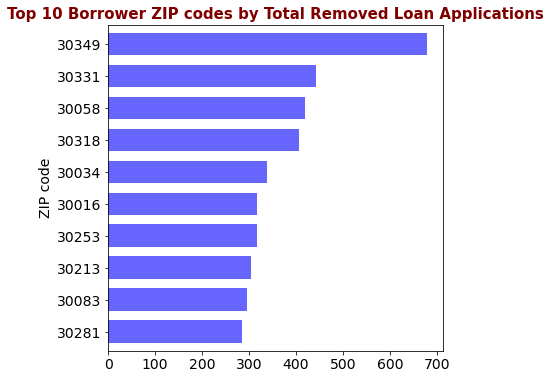

In [91]:
# plot the horizontal bar plot of borrower's zip code
plt.title('Top 10 Borrower ZIP codes by Total Removed Loan Applications',fontdict={'fontsize':15, 'color':'maroon', 'weight':'bold'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g = df[df['mark'] == 'r'].groupby(['borrower_zip']).size().sort_values(ascending = False).head(10).sort_values().plot.barh(x='borrower_zip', figsize=(6, 6),color='blue',alpha=0.6, width=0.7)
g.set_ylabel("ZIP code", fontsize = 14)

#### Borrower zip code
According to the histogram, we can see that part of zip codes have more applicants and might be relevant to removal rate. 30349, 30331 and 30058 are top 3 zip codes that have the highest removal rate. This variable can provide info to distinguish between removed and non-removed loans. We would select this variable to feed into our predictive model.
* NOTE: before feed borrower zip code to predictive model, we would transform it to latitude and longtitude for better reflect geologic information.

405    575694
464         4
455         4
202         2
457         2
491         1
761         1
721         1
681         1
610         1
507         1
101         1
474         1
189         1
460         1
459         1
353         1
912         1
Name: sba_office_code, dtype: int64


<AxesSubplot:xlabel='sba_office_code', ylabel='count'>

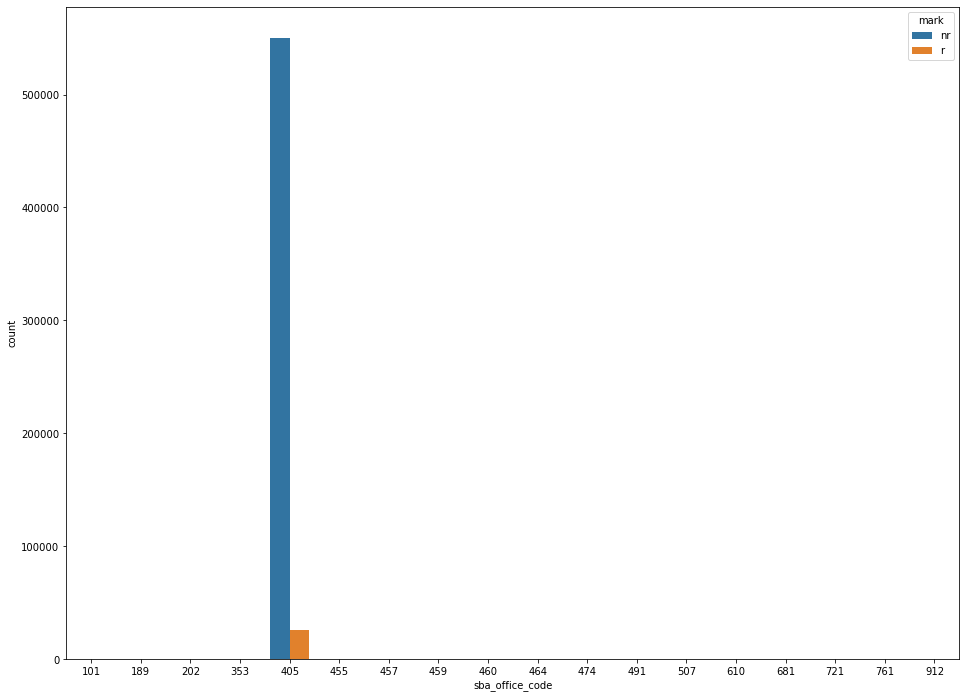

In [92]:
# SBA office code exploration
print(df['sba_office_code'].value_counts())

fig = plt.figure(figsize=(16,12))
sns.countplot(data=df, x="sba_office_code", hue="mark")


#### SBA office code
Based on the stats, we can see that most of SBA office code are 405. Only few obervations have other SBA office code. Because SBA office code is too aggregated and provide limited info to distinguish removed and non-removed loans, we would not select this variable to feed into our predictive model.

PPP    452853
PPS    122866
Name: processing_method, dtype: int64


processing_method  mark
PPP                nr      95.433176
                   r        4.566824
PPS                nr      96.256084
                   r        3.743916
dtype: float64

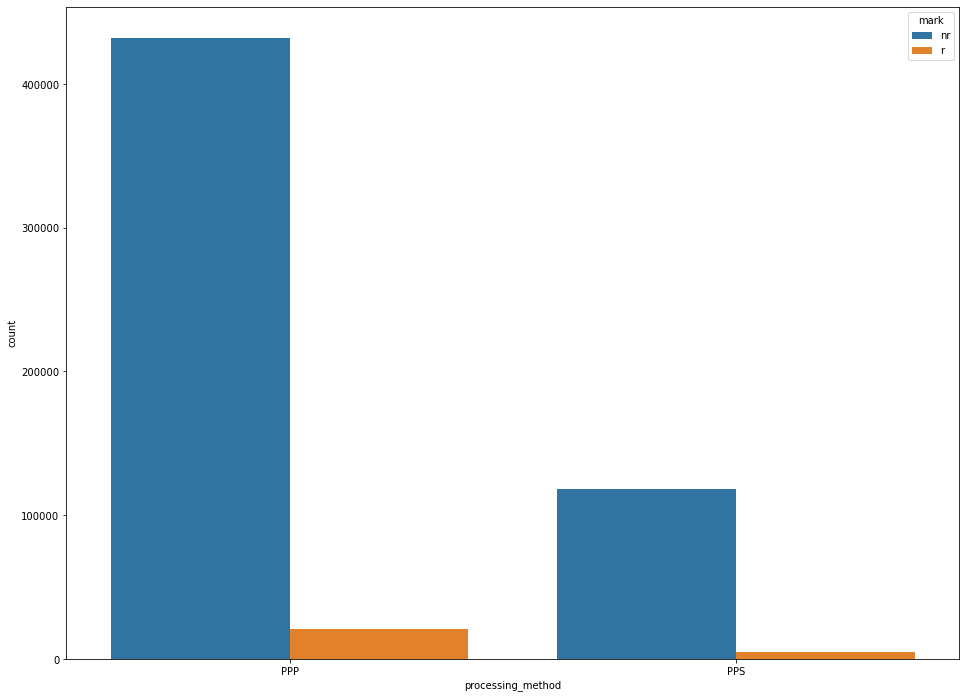

In [93]:
#processing_method exploration
print(df['processing_method'].value_counts())

fig = plt.figure(figsize=(16,12))
sns.countplot(data=df, x="processing_method", hue="mark")
df.groupby(["processing_method", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))

#### Processing Method
Based on the stats, we can see that two states of processing method, ppp and pps, have similar removal rate. Because processing method provide limited info to distinguish removed and non-removed loans, we would not select this variable to feed into our predictive model.

Paid in Full           277974
Exemption 4            274583
Active Un-Disbursed     23162
Name: loan_status, dtype: int64


loan_status          mark
Active Un-Disbursed  nr        1.485191
                     r        98.514809
Exemption 4          nr       99.103003
                     r         0.896997
Paid in Full         nr      100.000000
dtype: float64

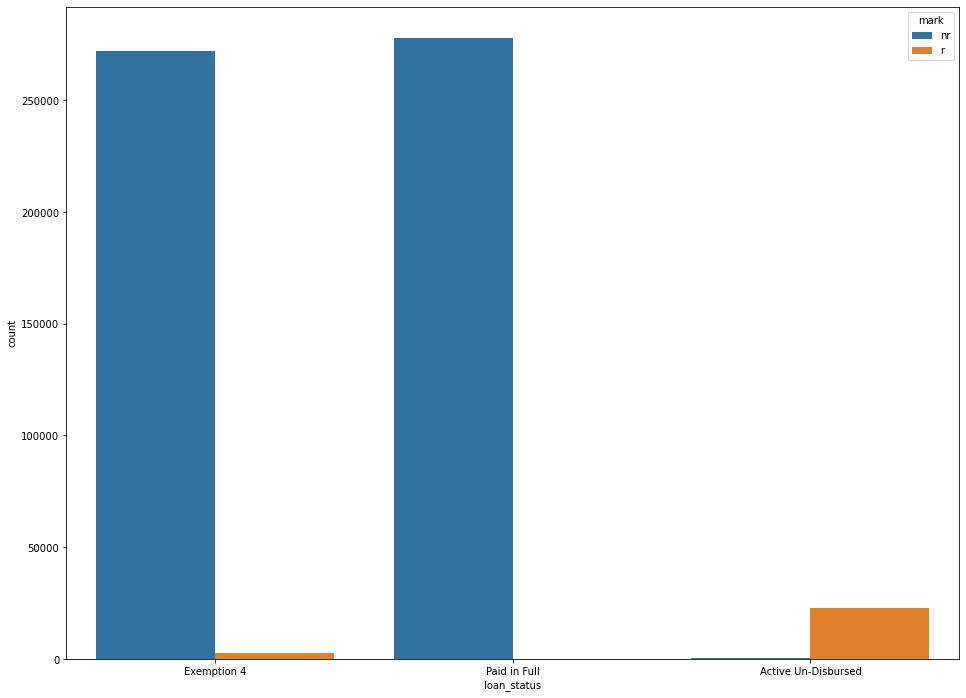

In [94]:
# Loan Status exploration
print(df['loan_status'].value_counts())

fig = plt.figure(figsize=(16,12))
sns.countplot(data=df, x="loan_status", hue="mark")
df.groupby(["loan_status", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))


#### Loan status
We can see from the graph that removed loans dominate Active Un-disbursed. On the other hand, paid in full only contains non-removed loans. The info provided by loan status can help us distinguish removed and non-removed loans. We would select this variable to feed into our predictive model.

* Note: Exemption 4 protects "trade secrets and commercial or financial information obtained from a person that is privileged or confidential." This exemption is intended to protect the interests of both the government and submitters of information.

1      412424
2       28111
3       19450
4       15636
5       13253
        ...  
407         1
431         1
459         1
381         1
495         1
Name: jobs_retained, Length: 461, dtype: int64


jobs_retained   mark
(-0.5, 10.0]    nr       95.231408
                r         4.768592
(10.0, 20.0]    nr       99.559934
                r         0.440066
(20.0, 30.0]    nr       99.759010
                           ...    
(470.0, 480.0]  r         0.000000
(480.0, 490.0]  nr      100.000000
                r         0.000000
(490.0, 500.0]  nr       99.200000
                r         0.800000
Length: 100, dtype: float64

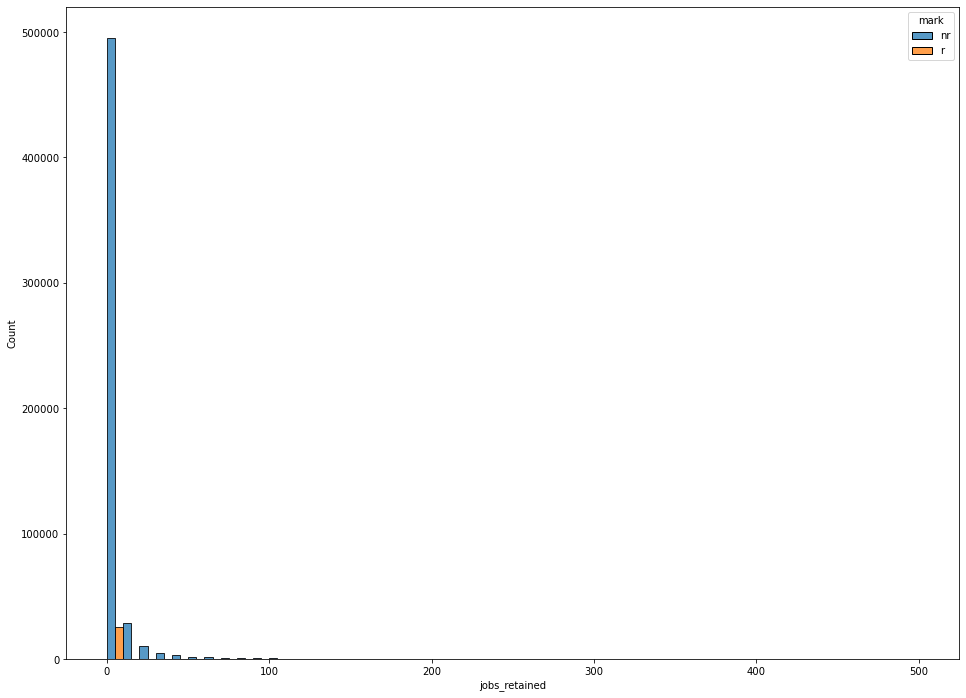

In [95]:
# Jobs retained exploration
print(df['jobs_retained'].value_counts())

fig = plt.figure(figsize=(16,12))
sns.histplot(data=df, x="jobs_retained", hue="mark", bins = 50, multiple = "dodge")
df.groupby([pd.cut(df["jobs_retained"], bins = 50), "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))


#### Jobs retained
Jobs retained in removed loans concentrates in a range between 0 - 10. Jobs retained in non-removed loans has wider distribution from 0 to over 100. In vernacular, the info provided by jobs retained can help us distinguish removed and non-removed loans. We would select this variable to feed into our predictive model.

naics_code  mark
11          nr      98.312937
            r        1.687063
21          nr      89.743590
            r       10.256410
22          nr      97.685185
            r        2.314815
23          nr      95.873612
            r        4.126388
31          nr      93.979505
            r        6.020495
32          nr      97.220738
            r        2.779262
33          nr      95.362595
            r        4.637405
42          nr      95.399321
            r        4.600679
44          nr      95.590214
            r        4.409786
45          nr      94.977335
            r        5.022665
48          nr      95.500998
            r        4.499002
49          nr      94.119868
            r        5.880132
51          nr      96.166050
            r        3.833950
52          nr      97.023856
            r        2.976144
53          nr      96.663099
            r        3.336901
54          nr      96.690584
            r        3.309416
55          nr      98.

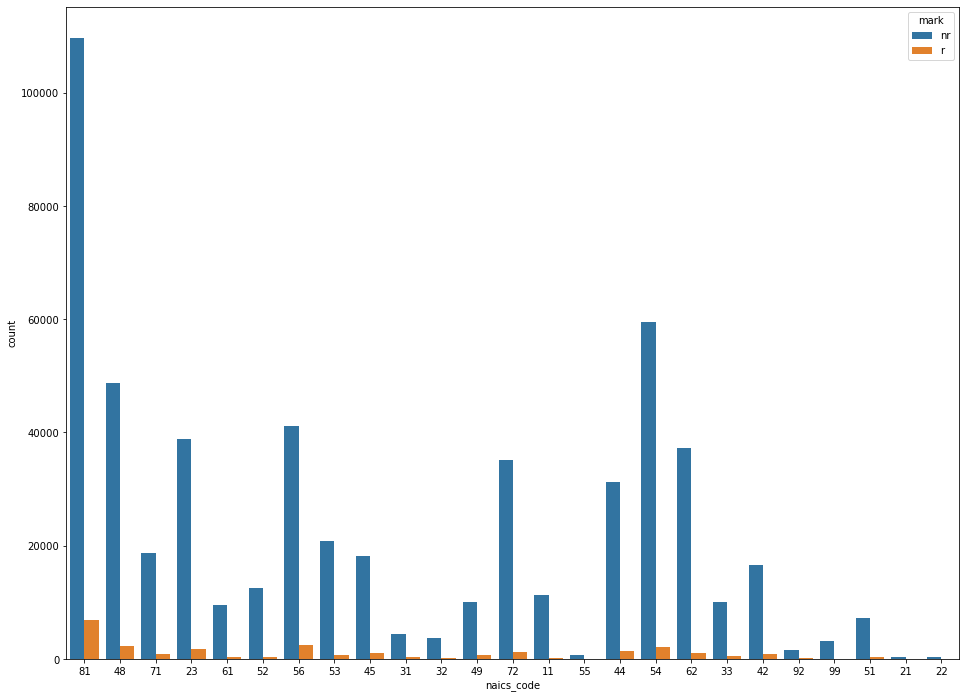

In [96]:
# NAICS code exploration
fig = plt.figure(figsize=(16,12))

sns.countplot(data=df, x="naics_code", hue="mark")
df.groupby(["naics_code", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))



(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

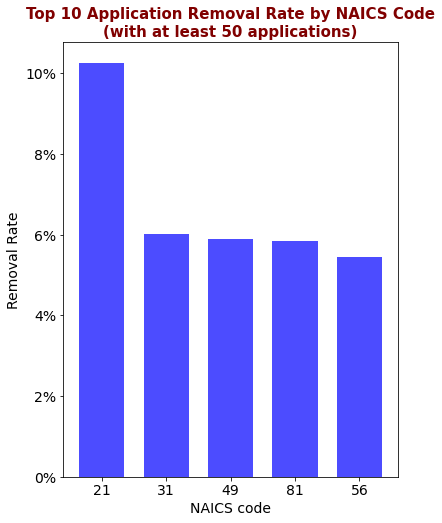

In [99]:
#Top 5 Removal Rate by NAICS codes
filter_cases = df.groupby('naics_code').filter(lambda x: len(x) > 1)
after = filter_cases.groupby(['naics_code', 'mark']).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).reset_index(drop=False)\
.sort_values(['mark',0], ascending = (False, False)).rename(columns={0:'proportion'}).head(5)

g = after.plot.bar(x='naics_code',figsize=(6, 8),color='blue',alpha=0.7, width=0.7)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
g.set_title('Top 10 Application Removal Rate by NAICS Code\n(with at least 50 applications)', fontdict={'fontsize':15, 'color':'maroon', 'weight':'bold'})
g.get_legend().remove()
g.tick_params(axis='x', labelrotation=0)
g.set_xlabel('NAICS code', fontsize = 14)
g.set_ylabel('Removal Rate', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)



#### NAICS code
NAICS code 81 has the most applicants, and 21 has the highest removal rate. The info provided by NAICS code can help us distinguish removed and non-removed loans. We would select this variable to feed into our predictive model.

In [100]:
# Servicing lender state exploration
data_after = df.groupby('servicing_lender_state').filter(lambda x: len(x) > 500)
data_after.groupby(["servicing_lender_state", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).sort_values(ascending = False)


servicing_lender_state  mark
SD                      nr      100.000000
ID                      nr      100.000000
AR                      nr      100.000000
OK                      nr      100.000000
NC                      nr      100.000000
MO                      nr      100.000000
DE                      nr      100.000000
OH                      nr       99.983764
AL                      nr       99.963109
TN                      nr       99.904008
UT                      nr       99.895570
MS                      nr       99.882353
NJ                      nr       99.856640
SC                      nr       99.763872
GA                      nr       99.749839
NE                      nr       98.671685
WV                      nr       98.019802
FL                      nr       97.781505
NM                      nr       97.605893
NY                      nr       97.219412
VA                      nr       94.656489
CA                      nr       92.672897
AZ                      n

#### Servicing lender state
We can see from the stats that some stats have higher removal rate, while some stats have lower removal rate. Therefore, servicing lender state provide useful info to help us distinguish between removed and non-removed loans. However, we'd like to have more accurate geologic info, we would use servicing lender's zip code instead of servicing lender state.
* NOTE: before feed borrower zip code to predictive model, we would transform it to latitude and longtitude for better reflect geologic information.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Northwest FCU'),
  Text(0, 1, 'Newtek Small Business Finance, Inc.'),
  Text(0, 2, '1st Choice CU'),
  Text(0, 3, 'Capital Plus Financial, LLC'),
  Text(0, 4, 'Customers Bank'),
  Text(0, 5, 'The Enterprise Center Capital Corporation'),
  Text(0, 6, 'Texas National Bank'),
  Text(0, 7, 'Blue Ridge Bank, National Association'),
  Text(0, 8, 'BSD Capital, LLC dba Lendistry'),
  Text(0, 9, 'Leader Bank, National Association')])

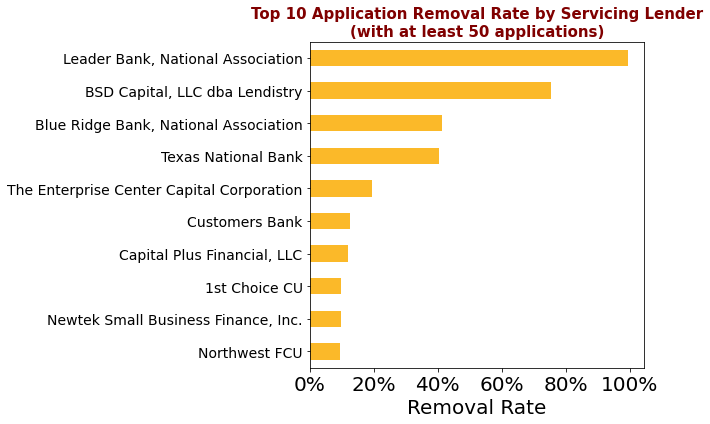

In [101]:
# Servicing lender location id exploration
df['servicing_lender_location_id']=df['servicing_lender_location_id'].astype(np.int64).astype(str)
filter_cases = df.groupby('servicing_lender_location_id').filter(lambda x: len(x) > 50)
after = filter_cases.groupby(["servicing_lender_location_id","servicing_lender_name", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).reset_index(drop=False)\
.sort_values(['mark',0], ascending = (False, False)).rename(columns={0:'proportion'}).head(10)

g = after[after['mark'] == 'r'][after['proportion'] >= 1].sort_values('proportion').plot.barh(x='servicing_lender_name', figsize=(6, 6), color = '#fbb929')
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
g.set_ylabel(None)
g.set_xlabel('Removal Rate', fontsize=20)
g.set_title('Top 10 Application Removal Rate by Servicing Lender\n(with at least 50 applications)', fontdict={'fontsize':15, 'color':'maroon', 'weight':'bold'})
g.get_legend().remove()
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)



In [ ]:
#amount exploration
fig = plt.figure(figsize=(8,6))

sns.displot(data=df, x=np.log10(df["amount"]), hue = "mark")

#### Amount
Based on the dictionary, initial_approval_amount was the amount that borrower applied, current_approval_amount was the amount that lender approved after reviewing, and amount was the amount recorded at the time of data released by SBA. 
We found amount and current_approval_amount were the same. We would use amount to feed into our predictive model.

<AxesSubplot:ylabel='Count'>

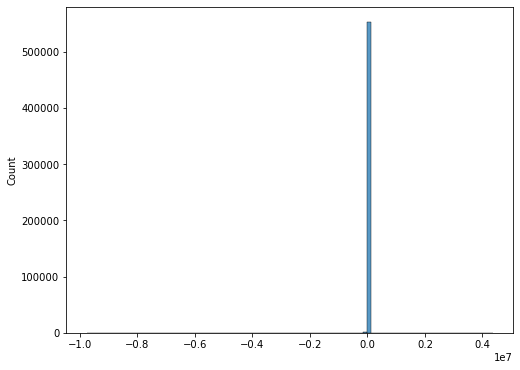

In [103]:
fig = plt.figure(figsize=(8,6))

sns.histplot(data=df_nremove, x=df_nremove["amount"] - df_nremove["initial_approval_amount"], bins = 100)

In [ ]:
# amount difference exploration

# amount_diff of removed loans at amount_diff not equal to zero
print(df['amount_diff'][(df['mark'] == 'r') & (df['amount_diff']!=0)].describe())
# amount_diff of non-removed loans at amount_diff not equal to zero
print(df['amount_diff'][(df['mark'] == 'nr') & (df['amount_diff']!=0)].describe())

In [ ]:
# Plot amount_diff of non-removed loans at amount_diff not equal to zero
fig = plt.figure(figsize=(8,6))

sns.distplot(x=df['amount_diff'][(df['mark'] == 'nr') & (df['amount_diff'] != 0)], bins = 100)

In [ ]:
# Plot amount_diff of removed loans at amount_diff not equal to zero
fig = plt.figure(figsize=(8,6))

sns.distplot(x=df['amount_diff'][(df['mark'] == 'r') & (df['amount_diff']!=0)], bins = 100)

#### Amount difference
Because initial_approval_amount was the amount that borrower applied and amount was the amount that lender approved after reviewing, if we use amount difference (amount - initial_approval_amount) can reflect the opinion of lender to the loan. If there was more negative on amount difference means lender was more reluctant to lend money to the borrower. 

Most of amount differences were zero, means in mose application, lenders were willing to lend the money that exactly equals to what borrower want to borrower. However, if we exclude amount differences eqaul zero, we found the median of removed loans were more negative than non-removed loans. This means compared to non-removed loans, lenders were more reluctant to lend money to the removed loans borrowers.

Amount difference provides useful info and we would feed it into our predictive model.

In [ ]:
#lmi_indicator exploration
fig = plt.figure(figsize=(8,6))

sns.histplot(data = df, x=df['lmi_indicator'], hue = df['mark'], bins = 100, multiple = 'dodge')

df.groupby(["lmi_indicator", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))

In [ ]:
# hubzon_indicator exploration
fig = plt.figure(figsize=(8,6))

sns.histplot(data = df, x=df['hubzone_indicator'], hue = df['mark'], bins = 100, multiple = 'dodge')

df.groupby(["hubzone_indicator", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))

In [ ]:
#rural_urban_indicator exploration
fig = plt.figure(figsize=(8,6))

sns.histplot(data = df, x=df['rural_urban_indicator'], hue = df['mark'], bins = 100, multiple = 'dodge')
df.groupby(["rural_urban_indicator", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))

#### Lmi indicator, hubzone indicator, and rural_urban indicator
For these three indicator, we can see that there are difference between removed and non-removed loans in lmi indicator and hubzone indicator. But there is no difference between removed and non-removed loans in rural_urban indicator.

We would select lmi indicator and hubzone indicator to feed into our predictive model.


In [ ]:
# approval date exploration
yearmonth = pd.DataFrame(df.groupby(["yearmonth", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()

yearmonth = yearmonth[yearmonth['mark'] == 'r'].rename(columns={0: 'removal rate'})

ax = sns.barplot(data = yearmonth, x=yearmonth['yearmonth'].astype('category'), y = 'removal rate')
plt.xticks(rotation=45)

In [ ]:
#sns.set_style('white')
g = df[['mark','initial_approval_amount','yearmonth']]
g = g.groupby(["yearmonth", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).reset_index(drop=False).sort_values(['mark','yearmonth'], ascending = (False, True)).rename(columns={0:'proportion'}).head(11)

g.yearmonth = g.yearmonth.astype(str)
# g = g.sort_values(by=['yearmonth'])
fig, ax = plt.subplots(figsize=(11,5))
s = sns.lineplot(x='yearmonth', y='proportion', data=g, marker='d',linewidth = 2.5, palette = 'b')
s.set_xticklabels(g.yearmonth,rotation=45, ha='right')
#s.axes.set_title('Monthly Removal Rate (April 2020 - June 2021)',fontdict={'fontsize':24, 'color':'maroon', 'weight':'bold'})
s.set_xlabel(None)
s.set_ylabel("Removal rate",fontsize=18)
s.tick_params(labelsize=18)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# plt.show(g)
plt.rcParams['figure.facecolor'] = '#DDEED1'
#for x,y in g[['yearmonth','proportion']].values:
    #ax.text(x,y+0.5,f'{y:.2f}% ',color='black', fontsize='15', ha='center')

bg = s.patch
bg.set_facecolor('#DDEED1')

In [ ]:
#Application Counts by Loan Amount Figures - Line chart
g = df[['mark','yearmonth','if_decimal_equal_zero']]
g = g.groupby(['yearmonth','mark'])['if_decimal_equal_zero'].count().reset_index()

g.yearmonth = g.yearmonth.astype(str)
g = g.sort_values(by=['mark','yearmonth'])
fig, ax = plt.subplots(figsize=(7,5))
s = sns.lineplot(x='yearmonth', y='if_decimal_equal_zero', data=g, hue='mark',marker='d')
s.set_xticklabels(g.yearmonth,rotation=45, ha='center')
s.set(xlabel='date', ylabel='number of applications')
plt.show()

#### Yearmonth
As we can see from the graph, removal rate increased dramatically after April 2021. We guess because March 2021 was the deadline and after April 2021 was extension period. Loan applications were not in good quality because applicant prepared their application in rush.

Yearmonth is a useful variable to distinguish classes. We would select this variable.

In [ ]:
# Exploration of final digit of amount
end_1 = df[df['initial_approval_amount'] % 10 == 1]
end_2 = df[df['initial_approval_amount'] % 10 == 2]
end_3 = df[df['initial_approval_amount'] % 10 == 3]
end_4 = df[df['initial_approval_amount'] % 10 == 4]
end_5 = df[df['initial_approval_amount'] % 10 == 5]
end_6 = df[df['initial_approval_amount'] % 10 == 6]
end_7 = df[df['initial_approval_amount'] % 10 == 7]
end_8 = df[df['initial_approval_amount'] % 10 == 8]
end_9 = df[df['initial_approval_amount'] % 10 == 9]
end_0 = df[df['initial_approval_amount'] % 10 == 0]

In [ ]:
print(end_1.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_2.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_3.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_4.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_5.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_6.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_7.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_8.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_9.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))
print(end_0.groupby(["mark"]).size().transform(lambda x: 100 * x / float(x.sum())))


In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(16,12))
sns.histplot(data = end_1, x=df['mark'], bins = 100, ax=axes[0, 0]).set(title='Amount ends with 1')
sns.histplot(data = end_2, x=df['mark'], bins = 100, ax=axes[0, 1]).set(title='Amount ends with 2')
sns.histplot(data = end_3, x=df['mark'], bins = 100, ax=axes[0, 2]).set(title='Amount ends with 3')
sns.histplot(data = end_4, x=df['mark'], bins = 100, ax=axes[0, 3]).set(title='Amount ends with 4')
sns.histplot(data = end_5, x=df['mark'], bins = 100, ax=axes[0, 4]).set(title='Amount ends with 5')
sns.histplot(data = end_6, x=df['mark'], bins = 100, ax=axes[1, 0]).set(title='Amount ends with 6')
sns.histplot(data = end_7, x=df['mark'], bins = 100, ax=axes[1, 1]).set(title='Amount ends with 7')
sns.histplot(data = end_8, x=df['mark'], bins = 100, ax=axes[1, 2]).set(title='Amount ends with 8')
sns.histplot(data = end_9, x=df['mark'], bins = 100, ax=axes[1, 3]).set(title='Amount ends with 9')
sns.histplot(data = end_0, x=df['mark'], bins = 100, ax=axes[1, 4]).set(title='Amount ends with 0')

#### Final digit of amount
We explore final digit of amount because we assume if a loan application is a fraud, it's amount would have high probability to end with certain digit. However after the visualiztion and stats, we found no significat differences between removed and non-removed loans in final digit of amount. Therefore, we will not select this variable.

In [ ]:
# Explore the amount with and without decimals
df['decimal'][df['decimal'] != 0].count()

In [ ]:
sns.histplot(data = df, x=df['decimal'][df['decimal'] != 0], hue = df['mark'], bins = 100, multiple = 'dodge')
df[df['decimal'] != 0].groupby(["decimal", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))

In [ ]:
sns.histplot(data = df, x=df['if_decimal_equal_zero'].astype(str), hue = df['mark'], bins = 100, multiple = 'dodge')
df.groupby(["if_decimal_equal_zero", "mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))

In [ ]:
g = df.groupby(['mark','if_decimal_equal_zero']).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).reset_index(drop=False).rename(columns={0:'proportion'})
x = ['nr', 'r']
y1 = g[g['if_decimal_equal_zero'] == 0]['proportion']
y2 = g[g['if_decimal_equal_zero'] == 1]['proportion']
plt.bar(x, y2, color='#B7C3F3', width=0.5)
plt.bar(x, y1, bottom=y2, color='#8EB897', width=0.5)
plt.rcParams['figure.figsize']=(4,5)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
plt.xticks([0, 1], ['Non-removed', 'Removed'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title('Proportion of Loan Amount Figures by Application Status', fontdict={'fontsize':22, 'color':'maroon', 'weight':'bold'})
plt.legend(labels=['Loans with decimal numbers', 'Loans without decimal numbers'], loc='lower left', bbox_to_anchor=(1, 0.5), borderaxespad=1, fontsize=12)
plt.margins(x=0.2, tight=True)

#### If decimal equal zero
We found that there are 55,997 loans' amount with decimals. This accounts near 10% of all applications. We gave the loans with or without decimals marks. If loan with decimal, it's marked as 0, otherwise 1, if loan without decimal.

As we can see from the graph, loans with decimal have higher percentage belong to removed loans. So this variable can provide us info to distinguish removed and non-removed loans. We would select this variable.

In [ ]:
# Plot Business Type
df_after = df.groupby('business_type_classification').filter(lambda x: len(x) > 1)
g = df_after.groupby(["business_type_classification","mark"]).size().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).unstack(1).plot.barh(stacked=True, figsize=(5, 5))
g.set_title('Proportion of Application Status by Business Type',fontdict={'fontsize':15, 'color':'maroon'})
g.set(ylabel=None)
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# Put the legend out of the figure
g.legend(labels=['Approved', 'Removed'], loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=1)
g.margins(x=0)

#### Business Type
We can see that small company have more perventage of removed loans than other types. So variable of business type can help us to distinguish between classes. So we select this variable and would put it into the predictive model.

## Predictive Models Building

#### Prepare training and testing data

In [ ]:
x = df[['amount', 'borrower_lat', 'borrower_lng', 'naics_code', 'business_type_classification', 'jobs_retained', 'loan_status', 'servicing_lender_lat', 'servicing_lender_lng', 'hubzone_indicator',
       'business_age_description', 'lmi_indicator', 'forgiveness_amount', 'amount_diff', 'if_decimal_equal_zero', 'yearmonth']]
y = df['mark']


In [ ]:
# convert labels into binary values
y[y == 'nr'] = 0

y[y == 'r'] = 1
y = y.astype(int)


In [ ]:
# Convert all categorical variables to dummies
x['yearmonth'] = x['yearmonth'].astype('category')
x = pd.get_dummies(x)


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20742)


### XGBoost

In [ ]:
# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, recall_score

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
# put the best hyperparameters

clf=xgb.XGBClassifier(objective="binary:logistic", 
                          #n_estimators = 201, 
                          #max_depth = 18, 
                          #gamma = 6.318764980604099,
                          #reg_alpha = 165.0,
                          #min_child_weight = 4.0,
                          #colsample_bytree = 0.6776250182922174, 
                          #reg_lambda = 0.9436398327545011,
                          use_label_encoder =False
                         )

clf.fit(x_train, y_train)



In [ ]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
auc =roc_auc_score(y_test, y_pred)
print ("Accuracy:", accuracy)
print ("AUC:", auc)

AUC means the probability that the classifier will be able to distinguish between classes.
So 0.95 AUC of XGBoost means our XGBoost model has ability to distonguish 95% of loans to correct classes.

In [ ]:
# Make confusion matrix of XGBoost
from sklearn.metrics import confusion_matrix
cfm_xgb = confusion_matrix(y_test, y_pred)


In [ ]:
# Plot confusion matrix of XGBoost
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfm_xgb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of XGBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Plot ROC of XGBoost
xgb_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  xgb_pred_proba)
plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()

In [ ]:
# Loading library for plotting xgboost
from xgboost import plot_tree
import graphviz



In [ ]:
# Plot the XGBoost tree
xgb_tree__plot = plot_tree(clf, decision_tree = 'classifier', num_trees=21)
fig = xgb_tree__plot.figure
fig.set_size_inches(15, 15)

In [ ]:
# Plot the importance ranking of XGBoost
vip_plot = xgb.plot_importance(clf)
fig = vip_plot.figure
fig.set_size_inches(16, 12)

#### Variables' importance ranking by XGBoost
We can see from the graph that XGBoost recognize top five most important variables are amount, borrower's latitude and longtitude, and lender's latitude and longtitude. 

We interpret them as the amount of a loan application is the most important factor to decide if a loan would be removed or not. Next, borrower's and lender's infomation are the second important factors.


### Logistic Regression

In [ ]:
#Logistic Regression
from sklearn import linear_model


In [ ]:
model=linear_model.LogisticRegression()
model_fit = model.fit(x_train,y_train)


In [ ]:
y_pred = model.predict(x_test)


In [ ]:
# Make confusion matrix of LR
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
cfm_lr = confusion_matrix(y_test, y_pred)


In [ ]:
# Output performance of LR model
accuracy = accuracy_score(y_test, y_pred)
auc =roc_auc_score(y_test, y_pred)
print(accuracy)
print(auc)

In [ ]:
# plotting confusion matrix of LR
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfm_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Plot ROC of LR
lr_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  lr_pred_proba)
plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()


XGBoost got higher score both on accuracy and AUC than logistic regreesion. This means XGBoost is a better model in this prediction.

## Conclusion: 

In this project, we first used data processing to clean data. We then used EDA to explore the variables relationships. We selected 16 variables that have differences between removed and non-removed loans. We fed these 16 variables to two predictive models, XGBoost and logistic regression. We selected these two models because they are suitable for predictive classificaation problem, which is this case.

The best performance of our models comes from XGBoost with 0.95 AUC. This means based on our XGBoost model, we can identify 95% of obervations to correct classes.

## Limitation:
In this project, we only explore provided variables and used these variables to predict if a loan was removed by SBA. However, based on our finding, we don't know why SBA removed these loans. We infer that these loans were removed may cause by invalid information provided, and failing to pass reviewing. But we need more data and proves to connect the inferences to truths. 